In [2]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py

plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [3]:
# load the files
bead_date =20200924
bead_number = 1
dataset = "Shaking/Shaking340/"
FOI = "SpinShaking0"
dirname ="/data/new_trap/" + str(bead_date) + "/Bead%s/" %bead_number +dataset
filename = dirname + FOI


In [4]:
def load_dir_reduced_to_spin(dirname,file_prefix,start_file,max_files,step_size=100):
    '''
    Load spin information from the h5 files in a loop into a list.
    '''   
    ## Load all filenames in directory
    var_list = []
    files = []
    [files.append(file_) for file_ in os.listdir(dirname) if file_.startswith(file_prefix) if file_.endswith('.h5')]
    files.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
    print(len(files))
    print("Loading files")
    step_size = step_size
    for j in tqdm(np.arange(start_file,start_file+max_files,step_size)):
        BDFs = [BDF.BeadDataFile(dirname+filename) for filename in files[j:j+step_size]]
        [var_list.append(BDFs[k].spin_data[0]) for k in range(len(BDFs))]
        #[var_list.append(dt.datetime.fromtimestamp(BDFs[k].time[0]/1e9)) for k in range(len(BDFs))]
    return var_list

def spin_processor(bead_date,bead_number,dataset,run,start_file,max_files,fsamp):
    dirname ="/data/new_trap/" + str(bead_date) + "/Bead%s/" %bead_number +dataset
    fsamp = fsamp 
    res = fsamp
    spin_time = load_dir_reduced_to_spin(dirname,run,start_file,max_files)
    df_spin = pd.DataFrame()
    df_spin["spin_time"] = spin_time
    a_list = []
    p_list = []
    # for loop seem to be as slow as this
    df_spin["spin_amp"] = df_spin.spin_time.apply(lambda element: spin_data_to_amp_and_phase(element,fsamp,res)[1])
    df_spin["spin_phase"] = df_spin.spin_time.apply(lambda element: spin_data_to_amp_and_phase(element,fsamp,res)[2])
    #if(save_file==True):
    #    df.to_pickle(filename)
    return df_spin

def loop_run_spin_processor(bead_data,bead_number,dataset,run,start_file,max_files,fsamp,save_file=False):
    df_spin=pd.DataFrame()
    start_file=start_file
    end_file=max_files
    step_size=100
    for j in tqdm(np.arange(start_file,end_file,step_size)):
        print(j)
        try:
            df_temp = pd.DataFrame()
            df_temp = spin_processor(bead_date,bead_number,dataset,run,j,step_size,fsamp)
            df_spin = pd.concat([df_spin,df_temp],ignore_index=True)
        except: print("The %d-th file did not work. Maybe your specified max_file is longer than the datasets" %j)
    if(save_file==True):
        print("Feature is coming once tested")
    return df_spin


In [5]:
s = time.time()
df_spin = loop_run_spin_processor(bead_date,bead_number,dataset,run=FOI,start_file=0,max_files=10000,fsamp=200000)
e = time.time()
print(e-s)

  0%|          | 0/1 [00:00<?, ?it/s]

0
2500
Loading files



  0%|          | 0/1 [00:00<?, ?it/s]

100
2500
Loading files



  0%|          | 0/1 [00:00<?, ?it/s]

200
2500
Loading files



  0%|          | 0/1 [00:00<?, ?it/s]

300
2500
Loading files



  0%|          | 0/1 [00:00<?, ?it/s]

400
2500
Loading files



  0%|          | 0/1 [00:00<?, ?it/s]

500
2500
Loading files



  0%|          | 0/1 [00:00<?, ?it/s]

600
2500
Loading files



  0%|          | 0/1 [00:00<?, ?it/s]

700
2500
Loading files



  0%|          | 0/1 [00:00<?, ?it/s]

800
2500
Loading files



  0%|          | 0/1 [00:00<?, ?it/s]

900
2500
Loading files



  0%|          | 0/1 [00:00<?, ?it/s]

1000
2500
Loading files



  0%|          | 0/1 [00:00<?, ?it/s]

1100
2500
Loading files



  0%|          | 0/1 [00:00<?, ?it/s]

1200
2500
Loading files



  0%|          | 0/1 [00:00<?, ?it/s]

1300
2500
Loading files



  0%|          | 0/1 [00:00<?, ?it/s]

1400
2500
Loading files



  0%|          | 0/1 [00:00<?, ?it/s]

1500
2500
Loading files



  0%|          | 0/1 [00:00<?, ?it/s]

1600
2500
Loading files



  0%|          | 0/1 [00:00<?, ?it/s]

1700
2500
Loading files



  0%|          | 0/1 [00:00<?, ?it/s]

1800
2500
Loading files



  0%|          | 0/1 [00:00<?, ?it/s]

1900
2500
Loading files



  0%|          | 0/1 [00:00<?, ?it/s]

2000
2500
Loading files



  0%|          | 0/1 [00:00<?, ?it/s]

2100
2500
Loading files



  0%|          | 0/1 [00:00<?, ?it/s]

2200
2500
Loading files



  0%|          | 0/1 [00:00<?, ?it/s]

2300
2500
Loading files



  0%|          | 0/1 [00:00<?, ?it/s]

2400
2500
Loading files



100%|██████████| 1/1 [00:00<00:00, 2041.02it/s]

2500
2500
Loading files
2600
2500
Loading files
2700
2500
Loading files
2800
2500
Loading files
2900
2500
Loading files
3000
2500
Loading files
3100
2500
Loading files
3200
2500
Loading files
3300



100%|██████████| 1/1 [00:00<00:00, 2442.81it/s]


2500
Loading files
3400
2500
Loading files
3500
2500
Loading files
3600
2500
Loading files
3700
2500
Loading files
3800
2500
Loading files
3900
2500
Loading files
4000
2500
Loading files
4100
2500
Loading files
4200
2500
Loading files


100%|██████████| 1/1 [00:00<00:00, 2251.37it/s]

4300
2500
Loading files
4400
2500
Loading files
4500
2500
Loading files
4600
2500
Loading files
4700
2500
Loading files
4800
2500
Loading files
4900
2500
Loading files
5000
2500
Loading files
5100



100%|██████████| 1/1 [00:00<00:00, 2138.86it/s]

2500
Loading files
5200
2500
Loading files
5300
2500
Loading files
5400
2500
Loading files
5500
2500
Loading files
5600
2500
Loading files
5700
2500
Loading files
5800
2500
Loading files
5900



100%|██████████| 1/1 [00:00<00:00, 1823.61it/s]

2500
Loading files
6000
2500
Loading files
6100
2500
Loading files
6200
2500
Loading files
6300
2500
Loading files
6400
2500
Loading files
6500
2500
Loading files
6600
2500
Loading files
6700



100%|██████████| 1/1 [00:00<00:00, 2974.68it/s]

2500
Loading files
6800
2500
Loading files
6900
2500
Loading files
7000
2500
Loading files
7100
2500
Loading files
7200
2500
Loading files
7300
2500
Loading files
7400
2500
Loading files
7500
2500



100%|██████████| 1/1 [00:00<00:00, 2641.25it/s]

Loading files
7600
2500
Loading files
7700
2500
Loading files
7800
2500
Loading files
7900
2500
Loading files
8000
2500
Loading files
8100
2500
Loading files
8200
2500
Loading files
8300



100%|██████████| 1/1 [00:00<00:00, 1754.20it/s]

2500
Loading files
8400
2500
Loading files
8500
2500
Loading files
8600
2500
Loading files
8700
2500
Loading files
8800
2500
Loading files
8900
2500
Loading files
9000
2500
Loading files
9100
2500
Loading files
9200



100%|██████████| 100/100 [07:44<00:00,  4.64s/it]A

2500
Loading files
9300
2500
Loading files
9400
2500
Loading files
9500
2500
Loading files
9600
2500
Loading files
9700
2500
Loading files
9800
2500
Loading files
9900
2500
Loading files
464.023432970047


In [6]:
df_spin

,spin_time,spin_amp,spin_phase
0,"[-1.0344922560784924, -1.0336317560033421, -1....","[9.571392418277975e-30, 4.6982442191954704e-08...","[0.0, 0.6927294873355795, 2.7110033739881576, ..."
1,"[-1.034022892401051, -1.0337882105624083, -1.0...","[1.2878780044111276e-32, 1.501971467167533e-09...","[0.0, -2.7608730436852182, 1.9554774024133177,..."
2,"[-1.0370737563081434, -1.0369955290283643, -1....","[4.1506382015548705e-31, 3.538671460673434e-08...","[3.141592653589793, 2.2864876281891147, -1.385..."
3,"[-1.0431754841487904, -1.043019029588332, -1.0...","[2.646250995879541e-31, 2.578132424695243e-08,...","[3.141592653589793, 1.8248479800145254, 0.1033..."
4,"[-1.0420020749459198, -1.0412980294248257, -1....","[1.96622901439038e-30, 8.949331402207968e-10, ...","[0.0, 2.2571300636775025, 1.5445018682559546, ..."
...,...,...,...
2495,"[-1.0768132151932106, -1.0771261243243535, -1....","[5.94237927372793e-33, 2.2880246173802984e-08,...","[0.0, 2.367536003502294, 1.5920518613037251, -..."
2496,"[-1.0858093527518484, -1.0854964436180394, -1....","[1.3918920432889429e-30, 7.065609690567139e-09...","[3.141592653589793, 2.014552091135283, 1.32041..."
2497,"[-1.0646879864349332, -1.0635928044896041, -1....","[2.2478208428963837e-30, 6.955945956003231e-09...","[3.141592653589793, 0.8055401237452624, 2.1119..."
2498,"[-1.0748575331257366, -1.0773608061727733, -1....","[3.9436340228332215e-31, 2.63111131170903e-08,...","[3.141592653589793, 2.093666969997817, 1.51916..."


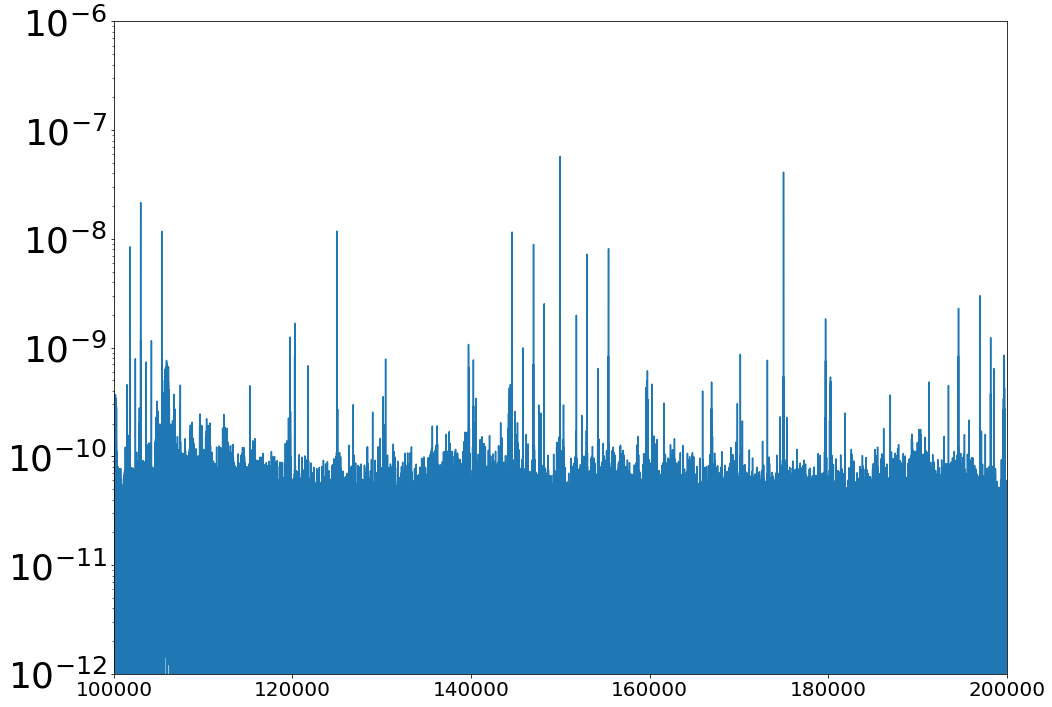

In [7]:
plt.plot(df_spin.spin_amp[0])
plt.xlim(100000,200000)
plt.ylim(1e-12,1e-6)
plt.yscale("log")

In [20]:
# save the file
base_proc = "/data/new_trap_processed/processed_files/" + str(bead_date) +  "/Bead%s/" %bead_number

try:
    os.makedirs(base_proc+dataset)
    print("Created subdirs %s" %dataset)
except:
    print("Folder exists or you do not have permissions")
    
outputname = base_proc + dataset+FOI+"_spin.pkl"
if(os.path.isfile(outputname)==False):
    df_spin.to_pickle(outputname)
    print("Successfully saved spin file")
else:print("No spin file produced. %s exists already!" %outputname)    

Folder exists or you do not have permissions
Successfully saved spin file


In [21]:
base_proc = "/data/new_trap_processed/processed_files/" + str(bead_date) +  "/Bead%s/" %bead_number
df_spin = pd.read_pickle(base_proc + dataset+FOI+"_spin.pkl")

In [22]:
def freq_phase_extractor(df_spin,full=True):
    frequency = 3
    no_harmonics=15
    if(full==True): fq = np.arange(10,25000,10)
    if(full==False): fq= np.arange(frequency*10,no_harmonics*10*frequency,10*frequency)   
    for f in tqdm(fq):
        foi =[]
        poi=[]
        for i in range(len(df_spin)):
            foi.append(df_spin.spin_amp[i][f-5:f+5].mean())
            poi.append(df_spin.spin_phase[i][f])
        df_spin["freq_%d" %(f/10)] = foi
        df_spin["phase_%d"%(f/10)] = poi
    return df_spin

In [23]:
df_spin = freq_phase_extractor(df_spin,full=True)

100%|██████████| 2499/2499 [02:02<00:00, 20.40it/s]


In [24]:
base_proc = "/data/new_trap_processed/processed_files/" + str(bead_date) +  "/Bead%s/" %bead_number
outputname = base_proc + dataset+FOI+"_spin_full_freq_only.pkl"
df_red = df_spin.drop(columns=["spin_amp","spin_phase","spin_time"])
df_red.to_pickle(outputname)
print(outputname)

/data/new_trap_processed/processed_files/20200614/Bead1/Shaking/Shaking367/NoSpinNoShaking0__spin_full_freq_only.pkl


In [25]:
base_proc = "/data/new_trap_processed/processed_files/" + str(bead_date) +  "/Bead%s/" %bead_number
df_spin = pd.read_pickle(base_proc + dataset+FOI+"_spin_full_freq_only.pkl")

In [26]:
df_red

,freq_1,phase_1,freq_2,phase_2,freq_3,phase_3,freq_4,phase_4,freq_5,phase_5,...,freq_2495,phase_2495,freq_2496,phase_2496,freq_2497,phase_2497,freq_2498,phase_2498,freq_2499,phase_2499
0,2.698394e-09,2.657920,6.690071e-10,-0.587366,3.113752e-10,-1.589908,7.022076e-10,-1.565677,1.378564e-09,-1.123267,...,1.658852e-10,0.720477,1.566683e-10,1.696044,2.069059e-10,3.057557,1.191601e-10,-1.327558,7.739855e-11,-3.121088
1,6.289820e-09,-1.959535,5.779012e-10,-1.728669,7.512133e-10,0.055072,6.028108e-10,1.414217,1.293265e-09,2.605218,...,1.725482e-10,-2.869395,3.350604e-10,0.608267,2.327356e-10,1.770280,1.120925e-10,1.950577,1.630509e-10,1.605195
2,1.316793e-08,2.652907,1.198070e-09,1.081546,7.957918e-10,1.011753,4.648061e-10,2.564810,2.148388e-09,1.234405,...,2.061504e-10,-0.788962,2.026210e-10,-0.033237,1.366961e-10,-0.164489,1.159775e-10,0.317698,1.702580e-10,-2.154928
3,1.364226e-08,1.549473,7.793044e-10,-3.017058,6.598660e-10,0.059062,8.083873e-10,-2.568398,1.509774e-09,0.522481,...,2.261940e-10,1.833993,2.266544e-10,-2.600998,1.529150e-10,2.644687,3.107618e-10,-2.436378,1.169416e-10,-0.100900
4,1.475871e-08,-1.383672,2.158634e-09,-2.167857,9.954045e-10,-1.078410,6.874106e-10,0.327430,3.873352e-09,1.497776,...,1.904211e-10,2.501978,2.717387e-10,-0.443446,2.356482e-10,-2.864872,9.204181e-11,2.121335,1.856181e-10,2.625231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.261559e-08,1.327681,6.532036e-08,-1.011012,5.563353e-09,1.035300,2.575120e-09,1.980972,6.122039e-09,1.768379,...,2.082631e-10,-0.123951,1.970992e-10,0.553306,1.738164e-10,1.802898,3.215583e-10,-1.924113,3.091556e-10,-3.011015
996,1.300425e-08,-1.340834,1.317870e-08,-0.060844,1.541157e-09,-0.051966,1.905540e-09,-0.163223,2.994315e-09,2.701200,...,2.888750e-10,-0.188391,2.304922e-10,1.653319,1.764929e-10,0.024282,1.305706e-10,1.657990,1.405079e-10,0.944220
997,1.247188e-07,-0.004549,3.898716e-08,2.904893,1.362109e-09,-3.136718,1.738777e-09,2.038666,4.587452e-10,-3.096253,...,1.636192e-10,-2.606279,2.208661e-10,-0.315128,1.170176e-10,-0.210603,1.315506e-10,-2.689260,1.767423e-10,2.511391
998,1.395979e-07,1.403583,6.003043e-08,-2.727187,1.000975e-08,1.881226,4.952954e-09,1.473844,5.995039e-09,0.813535,...,1.216794e-10,1.577052,1.802491e-10,3.051550,2.020900e-10,0.730378,6.690677e-11,1.327560,1.796659e-10,-0.493798
